<a href="https://colab.research.google.com/github/mattdo40/Colab/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [706]:
import math
import numpy as np
import random
import sklearn
from sklearn.metrics import accuracy_score

In [707]:
def F(W,X):
  return sum([w*x for w,x in zip(W,X)])

In [708]:
def sigmoid(x):
  return 1.0/(1+math.exp(-x))

In [709]:
def classify(Y):
  return [1 if y > 0.5 else 0 for y in Y]

In [710]:
def predictor(model, x): #space saver
  w1 = model[0]
  w2 = model[1]
  v1 = model[2]
  z1 = sigmoid(F(w1, x))
  z2 = sigmoid(F(w2, x))
  Z = (1, z1, z2)
  y1 = sigmoid(F(v1,Z))
  return y1

Training Data

In [711]:
data = [((0,0), 0), ((0,1),1), ((1,0),1), ((1,1),0) ]

In [712]:
np.random.seed() #I think that we mentioned we could ge the same results of we chose the same seed
def randomWeights():
  w1 = []
  w2 = []
  v1 = []
  for i in range(3):
    w1.append(np.random.uniform(-1.0,1.0)) #choosing a larger random range started to give me strange results
    w2.append(np.random.uniform(-1.0,1.0))
    v1.append(np.random.uniform(-1.0,1.0))
  weights = [w1,w2,v1]
  return weights

In [713]:
def Backpropagation(weights, learningRate, data, xVal, epochs, squaredError, accuracy):
  w1 = weights[0]
  w2 = weights[1]
  v1 = weights[2]
  X = [(1, x1, x2) for ((x1, x2),r) in data]
  R = [r for ((x1, x2),r) in data]
  for i in range(epochs):
    for (x, r) in xVal:
      z1 = sigmoid(F(w1, x))
      z2 = sigmoid(F(w2, x))
      Z = (1, z1, z2)
      y1 = sigmoid(F(v1,Z))

      dV = [learningRate * (r - y1) * z for z in Z]
      dW1 = [learningRate * (r - y1) * v1[1] * z1 * (1 - z1) * xi for xi in x]
      dW2 = [learningRate * (r - y1) * v1[2] * z2 * (1 - z2) * xi for xi in x]

      w1 = [w + dw for (w, dw) in zip(w1, dW1)]
      w2 = [w + dw for (w, dw) in zip(w2, dW2)]
      v1 = [v + dv for (v, dv) in zip(v1, dV)]


    if (i % 200) == 0:
      yPred = [predictor([w1, w2, v1], x) for x in X]
      SE = sum([pow(r - y, 2) for (r, y) in zip(R, yPred)])
      classPred = classify(yPred)
      acc = sklearn.metrics.accuracy_score(R, classPred)
      accuracy.append(acc)
      squaredError.append(SE)

  final = [w1, w2, v1]
  return final

Experiment Results 5 Times

Experiment  1
Initial random weights:  [[0.6896483651863199, 0.5085975472594919, -0.28829153374832295], [0.8265685083705481, -0.10625583464047073, 0.8797070915077894], [0.7552590310897023, 0.6704413432340615, -0.9118918865715462]]
Learning Rate:  0.25
Final Model: [[0.9321673279230005, -3.2955871117460855, -6.437175600445934], [3.383300157731636, -5.12058045000828, 7.469534259002005], [5.188826940522038, -5.545085946760578, -5.330907535998196]]
Y results:  [0.018969083614799893, 0.45898377315745414, 0.9804321415395668, 0.4686161438144504]
Classifications [0, 0, 1, 0]
Squared Error:  [1.022685616035125, 0.973617792510878, 0.7089619794985769, 0.5455427112104908, 0.5199611170727019]
Accuracy:  [0.5, 0.75, 0.75, 0.75, 0.75] 

Experiment  2
Initial random weights:  [[0.6654175222724739, -0.5186034451219546, -0.1559245583778781], [0.07130719734982272, -0.0374222479767381, 0.5804434340869253], [0.5125002617928738, -0.8274251008658979, -0.6496545004309431]]
Learning Rate:  0.25
Final Model: [[

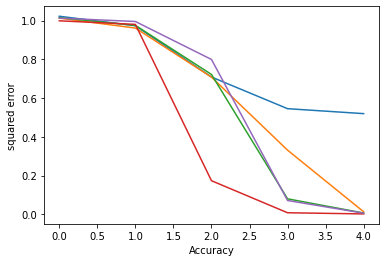

In [714]:
epochs  = 1000
learningRate = 0.25 # this seemed like a sweet spot between converging and time spent running
for i in range(5):
  print("Experiment ", i + 1)
  accuracy = []
  squaredError = []
  model = randomWeights()
  print("Initial random weights: ", model)
  print("Learning Rate: ", learningRate)
  result = Backpropagation(model, learningRate, data, xVal, epochs, squaredError, accuracy)
  print("Final Model:", result)
  yPred = [predictor(result, x) for x in X]
  print("Y results: ", yPred)
  print("Classifications", classify(yPred))
  print("Squared Error: ", squaredError)
  print("Accuracy: ", accuracy, "\n")
  plt.plot(squaredError)
  plt.xlabel("Accuracy")
  plt.ylabel("squared error")

The average time the algorithm was correct from what I've seen running this is between .6 and 0.75. It usually took about 800 epochs before it seemed to converge. I might be totally wrong but looking at the graph, squared error remained high in experiments that didn't get the correct result. Maybe it needs more epochs but I didn't want it to run for too long.